In [1]:
#01/02 new algo
#import
from functionToFill import *
from sklearn.linear_model import Lasso, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import urllib.request
import pandas as pd
from io import BytesIO
import pickle
import numpy as np
from keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten

d = Data()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def giveRes(target):
    targetClass = []
    for t in target:
        if t<0.5:
            targetClass.append('A')
        elif t>0.5:
            targetClass.append('H')
        else:
            targetClass.append('D')
    return targetClass

In [4]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import neighbors

regr = neighbors.KNeighborsClassifier(100)
#regr = svm.SVC(decision_function_shape='ovo')
#regr = SGDClassifier(loss="log")
regr.fit(data[0:40000], targetClass[0:40000])

NameError: name 'data' is not defined

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils

data, target = d.getMatrix(add='')#add='WithBet')
targetClass = giveRes(target)
data['target']=targetClass
data = data.dropna()
targetClass = data['target']
data = data.drop(columns='target')
encoder = LabelEncoder()
encoder.fit(targetClass)
encoded_Y = encoder.transform(targetClass)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [105]:
#Lets do a classification
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier



X_trainCl, X_testCl, y_trainCl, y_testCl = train_test_split(data, dummy_y, test_size=0.33, random_state=42)

# define baseline model
model = Sequential()
model.add(BatchNormalization(input_shape(32)))

model.add(Dense(30, input_dim=29, activation='tanh'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(15, activation='tanh'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(data, pd.DataFrame(dummy_y), epochs=8)


len data :  70914
len X_train :  47512
len X_test :  23402


NameError: name 'input_shape' is not defined

In [52]:
#test
regr = model
X_trainCl, X_testCl, y_trainCl, y_testCl = train_test_split(data, targetClass, test_size=0.33, random_state=42)
y_predCl = regr.predict(X_testCl)
good=0
bad=0
noBet=0
y_testCl = y_testCl.values
hashBet = ['A', 'D', 'H']


    
#regr is NN
d=0
goodd=0
for i in range(0, len(y_predCl)):  
    arg = hashBet[np.argmax(y_predCl[i])]
    if y_predCl[i][1]>0.5:
        arg='D'
    if arg==y_testCl[i]:# and y_predCl[i][arg]>0.5:
        good+=1
        if arg=='D':
            goodd+=1
    else:#if y_predCl[i][arg]>0.5:
        bad+=1   
    if arg=='D':
        d+=1
        
    
print('ratio of draw', d/(good+bad))
print('numb of good', good/(good+bad))
print('numb of goodd', goodd/d)

ratio of draw 0.18190752927100248
numb of good 0.56866934450047
numb of goodd 0.4980032887009631


In [22]:
print(list(targetClass).count('D')/len(targetClass))
y_testCl

0.26124601630143557


array(['H', 'D', 'H', ..., 'H', 'H', 'H'], dtype=object)

In [140]:
#This bloc show prediction for all tests in ss_test

def printThisSeasonCl(label, ss_test, regr, d,money0, miseInit0, inf, sup, inf_d, sup_d, exp=False):
    allMoneyWin = 0
    h=0
    dr=0
    a=0
    goodtot = 0
    badtot=0
    win = np.zeros(28)
    lose = np.zeros(28) 
    av = np.zeros(28)
    all=0
    hashBet = ['A', 'D', 'H']

    for k in range(0, len(ss_test)):#len(toTest)):
        money = money0
        moneys = []
        d.init_test()
        d.fill([ss_test[k]], toTrainBool=False)
        toTest = d.toTest
        toPredictTest = d.toPredictTest

        

        #display(toTest[0])
        
        bets = d.bets
        BM = d.BM
        X_test = toTest[0]#[-8:]

        #convert result
        y_testCl = giveRes(toPredictTest[0])  #[-8:]

        #X_test['H']=0.50
        #X_test['D']=0.10
        #X_test['A']=0.40
        X_test = X_test.drop(columns=['H', 'D','A'])
        y_predCl =  regr.predict(X_test)
        
        
        #for ronan
        #a = X_test.copy()
        #a['happened'] = y_testCl
        #a['ratioOfWhatHappened'] = toPredictTest[0]
        #a['whatIPredictHome'] = [row[2] for row in y_predCl]
        #a['whatIPredictDraw'] = [row[1] for row in y_predCl]
        #a['whatIPredictAway'] = [row[0] for row in y_predCl]
        #a.to_csv('Ronan/'+label[k]+'.csv')

        #print(ss_test[k][-8:][['HomeTeam','AwayTeam']], y_pred)
        good = 0
        tot = 0
        bad=0
        miseInit = miseInit0
        #inf = 0.36 #best is 0.36
        #sup = 0.63 #best is 0.63
        lim=0.5
        for i in range(0, len(y_testCl)):
            all+=1
            #av[int(y_pred[i]*15)] += 1
            home = bets[BM+'H'][X_test.index[i]]
            draw = bets[BM+'D'][X_test.index[i]]
            away = bets[BM+'A'][X_test.index[i]]
            if exp:
                if (money>5*miseInit):
                    mise = 2*miseInit #allow 2 succesive lose
                    if money>50*miseInit:
                        mise = 3*miseInit #allow  16 successive lose
                    else: 
                        mise=2.5*miseInit
                    if money>100*miseInit:
                        mise = 5*miseInit #allow 20 successive lose
                    else:
                        mise= 3*miseInit
                    if money>300*miseInit:
                        mise = 8*miseInit #allow 20 successive lose
                    else:
                        mise= 5*miseInit
                else: 
                    mise=miseInit
            else:
                mise = miseInit
            
            #print(hashBet[np.argmax(y_predCl[i])] == y_testCl[i])
            if bets[BM+hashBet[np.argmax(y_predCl[i])]][X_test.index[i]]>1:
                arg = np.argmax(y_predCl[i])
               # if y_predCl[i][1]>0.3:
               #     arg=1
                pred = hashBet[arg]#y_predCl[i]
                if  (hashBet[arg]==y_testCl[i]) and bets[BM+pred][X_test.index[i]]>1:#y_testCl[i]== y_predCl[i]:# and y_predCl[i][arg]>lim:
                    good+=1
                    goodtot+=1
                    #pred = hashBet[np.argmax(y_predCl[i])]
                    #print(pred, bets[BM+pred][X_test.index[i]])
                    money = money + mise*bets[BM+pred][X_test.index[i]]*0.8- mise
                    moneys.append(money) 
                elif bets[BM+pred][X_test.index[i]]>1:
                  #  if y_predCl[i][arg]>lim: 
                    bad+=1
                    badtot+=1
                    money-=mise
                    moneys.append(money)
            #print(X_test['P1'][i],X_test['P2'][i], y_testCl[i], y_predCl[i][::-1])
        print('league :', label[k])
        print('rate of good bet : ', good/(good+bad))
        print('money win : ', money)
        print("##############################")
        allMoneyWin +=money  
    #plt.xticks(moneys, label)
        plt.plot(moneys, label=label[k])
    #plt.plot(lose, label='lose')
    #plt.plot(win, label='win')#, label=label[k])
    #plt.plot(av, label='av')
    plt.legend()
    title = 'bet on everithing with limit inf :', inf , 'and sup :', sup, 'in 17/18'
    plt.title(title)
    print("total rate of good bet", goodtot/(goodtot+badtot))
    print("all the money : ", allMoneyWin-money0*len(label))
    plt.plot(moneys, label=label[k])
    plt.show()
    print(len(label))



league : F1
rate of good bet :  0.6139240506329114
money win :  -4.055999999999981
##############################
league : P1
rate of good bet :  0.6956521739130435
money win :  4.00000000000001
##############################
league : N1
rate of good bet :  0.6854838709677419
money win :  52.160000000000025
##############################
league : SC0
rate of good bet :  0.5670103092783505
money win :  -12.535999999999994
##############################
league : E0
rate of good bet :  0.625
money win :  -4.383999999999985
##############################
league : F2
rate of good bet :  0.5632911392405063
money win :  -2.0159999999999876
##############################
league : SP1
rate of good bet :  0.644927536231884
money win :  -2.503999999999982
##############################
league : D2
rate of good bet :  0.4956521739130435
money win :  -1.2239999999999895
##############################
league : I2
rate of good bet :  0.5919540229885057
money win :  245.26400000000004
################

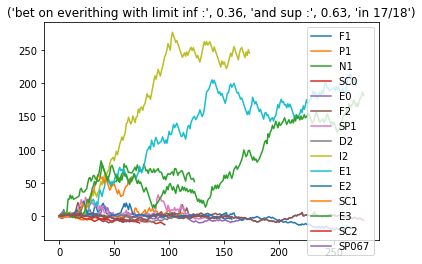

15


In [141]:
regr=model
d = Data()
path_data = 'http://www.football-data.co.uk/mmz4281/'
label = ['F1', 'P1', 'N1', 'SC0',  'E0', 'F2','SP1', 'D2', 'I2','E1', 'E2', 'SC1', 'E3', 'SC2']
csv = '.csv'
y = '1718/'
ss_test = []
for test in label:
    req = urllib.request.Request(path_data + y + test + csv)
    response = urllib.request.urlopen(req)
    the_page = response.read()
    test = pd.read_csv(BytesIO(the_page))
 #   print(test)
    ss_test.append(test)
#ss_test.append('SP06_07.csv')
ss_test.append('SP06_07.csv')
label.append('SP067')
printThisSeasonCl(label, ss_test, regr, d, money0=0, miseInit0=1, inf=.36, sup=0.63, inf_d=0.42, sup_d=0.58, exp=True)

In [58]:
def getOdds(match, BM):
    h = 2#getHome(match.HomeTeam)
    d = 1#getDraw()
    a = 10#getAway(match.AwayTeam)
    match[BM+'H']=h/(a+h+d)
    match[BM+'D']=d/(a+h+d)
    match[BM+'A']=a/(a+h+d)
    return match

In [156]:
def getMatch(ss_test, toTest, toPredictTest, toCome, regr, future, ago):

    #import the next mach and give on who should I bet
    from datetime import datetime, timedelta
    import dateparser

    hashBet = ['A', 'D', 'H']
    hashTable = {'Saint-Etienne':'St Etienne', 'PSG':'Paris SG',  'Bourg-en-Bresse':'Bourg Peronnas', 
                 'Quevilly-Rouen':'Quevilly Rouen', 'Châteauroux':'Chateauroux', 'GFC_Ajaccio':'Ajaccio GFCO', 
                'Le_Havre': 'Le Havre', 'Paris_FC': 'Paris FC', 'Nîmes': 'Nimes', 'West_Brom':'West Brom', 
                 'Crystal_Palace':'Crystal Palace', 'Man_City': 'Man City', 'Man_United': 'Man United', 
                 'West_Ham': 'West Ham', 'Waasland_Beveren':'Waasland-Beveren', 'Dundee FC' : 'Dundee',
                'Hull City':'Hull', 'Sheffield Wed':'Sheffield Weds','Nottingham':'Nott\'m Forest', 'Sheffield Utd':'Sheffield United'}


    path='toCome/'
    #for each country
    for index in range(0, len(toCome)):
        d.init_test()
        toComes = toCome[index]
        nbrOfTeams, teams = d.getTeams(ss_test[index], ss_test[index])
        c = Classement(teams)
                
        k=0
        toFill = pd.DataFrame(columns=d.matrixAttrib) 
        homes = []
        aways = []
        d.fill(ss_test, False)
        #for each day of champ
        isDay = True
        for line in open(path+toComes, 'r') :  
            line = line.strip()
            if isDay:
                day = int(line[0:2])
                date = dateparser.parse(line[13:], '%b %d %Y')
                isDay = False
            elif line is '' or line is '-':
                isDay = True
            #match line
            else:
                line = line.split(' - ')
                if (line[0] in hashTable):
                    home = hashTable[line[0]]
                else:
                    home = line[0]
                if(len(line)>1):
                    if (line[1] in hashTable):
                        away = hashTable[line[1]]
                    else:
                        away = line[1]
                    if(date-datetime.now()<timedelta(days=future) and date-datetime.now()>timedelta(days=ago)):
                        match =  pd.Series(data={'HomeTeam':home,'AwayTeam':away,'FTHG':0,'FTAG':0, d.BM+'H':0, d.BM+'D':0, d.BM+'A':0})
                        homes.append(home)
                        aways.append(away)
                        match = getOdds(match, d.BM)
                        d.c.fillSet(match, day, d.BM, k, toFill, d.toPredict, d.bets, 5)
                        k+=1
        toFill=toFill.drop(columns=['H','D','A'])
        if len(toFill)==0:
            print('Nothing to bet between', abs(ago), 'days ago and the', future,  'days to come!' )
        else:
            y_predCl = regr.predict(toFill)
            for i in range(0, len(y_predCl)): 
                pred = hashBet[np.argmax(y_predCl[i])]
                list = str(y_predCl[i][::-1])
                if y_predCl[i][1]>0.4:
                    pred='D'
                if pred =='D':
                    toPrint = homes[i] + '-' + aways[i] + ' : draw ' + list
                elif (pred =='A'):
                    toPrint = homes[i] + '-' + aways[i] + ' : ' + aways[i] + list
                elif  (pred=='H'):
                    toPrint = homes[i]+ '-'+ aways[i] + ' : '+ homes[i] + list
                u = 'http://lucasmessager.fr/api/?championnat='+toCome[index]+ str(i)+  '&match='+ toPrint
                req = urllib.request.Request(u.replace(' ', '%20'))
                urllib.request.urlopen(req)

In [157]:
from datetime import datetime, timedelta

d = Data()
leagues = ['B1','SP1', 'SP2', 'E0', 'E1','D1', 'D2','I1','I2','SC0','T1', 'N1', 'F1', 'F2','P1', 'G1']
#leagues = ['lateMatch.txt']
path_data = 'http://www.football-data.co.uk/mmz4281/'
regr=model
future = 1
ago = -3
req = urllib.request.Request('http://lucasmessager.fr/api/?reset')
urllib.request.urlopen(req)
infos = 'bet between '+ str(abs(ago))+ ' days ago and the '+ str(future)+  ' day(s) to come! the ' + str(datetime.now())
req = urllib.request.Request('http://lucasmessager.fr/api/?championnat=infos&match=test' + infos.replace(' ', '%20'))
urllib.request.urlopen(req)
for league in leagues:
    print('########################')
    print('#####for the league', league, '#####')

    req = urllib.request.Request(path_data + '1718/' + league + '.csv')
                           #'http://www.football-data.co.uk/mmz4281/1718/D2.csv')
    response = urllib.request.urlopen(req)
    the_page = response.read()
    test = pd.read_csv(BytesIO(the_page))

    ss_test = [test]
    toCome = [league + '18.txt']#'E18.txt']#, 'F18.txt']
    getMatch(ss_test, d.toTest, d.toPredictTest, toCome, regr, future=future, ago = ago)

########################
#####for the league B1 #####


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/dateparser/date.py:154: FutureWarning: Date formats should be list, tuple or set of strings
  warn(self.DATE_FORMATS_ERROR_MESSAGE, FutureWarning)


Nothing to bet between 3 days ago and the 1 days to come!
########################
#####for the league SP1 #####
Nothing to bet between 3 days ago and the 1 days to come!
########################
#####for the league SP2 #####
http://lucasmessager.fr/api/?championnat=SP218.txt0&match=Sp Gijon-Osasuna : draw [0.2113503  0.5373649  0.25128478]
########################
#####for the league E0 #####
Nothing to bet between 3 days ago and the 1 days to come!
########################
#####for the league E1 #####
http://lucasmessager.fr/api/?championnat=E118.txt0&match=Aston Villa-Preston : draw [0.36662212 0.5329893  0.10038853]
http://lucasmessager.fr/api/?championnat=E118.txt1&match=Barnsley-Burton : Burton[0.38292393 0.21466425 0.40241176]
http://lucasmessager.fr/api/?championnat=E118.txt2&match=Brentford-Birmingham : Brentford[0.76898175 0.13238192 0.09863641]
http://lucasmessager.fr/api/?championnat=E118.txt3&match=Middlesbrough-Hull : Middlesbrough[0.7678863  0.13272795 0.09938575]
http:/

KeyError: 'NAC Breda -'

In [ ]:
data['target']=targetClass
display(data.describe())

In [ ]:
regr.score(X_testCl, y_testCl)

In [ ]:
print(targetClass, encoded_Y)

In [92]:
from keras.models import load_model, model_from_json
import h5py

# serialize model to JSON
model_json = model.to_json()
with open("model/model57noBet.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights('model/model57noBet.h5')
print("Saved model to disk")

Saved model to disk


In [7]:
model.get_weights()
#model.summary()
#model.get_config()

[array([[-0.13976063,  0.14019017,  0.18106247,  0.22454782, -0.06594011,
          0.05660882,  0.13534918,  0.08261104,  0.23686136, -0.00589844,
          0.1512483 ,  0.23971051, -0.1151713 , -0.15621625, -0.23972024,
         -0.0656032 ,  0.25745755, -0.19731951, -0.07485341, -0.17794058,
          0.05122995,  0.14343272,  0.11324271,  0.00089815, -0.00865144,
         -0.11111154,  0.08304874, -0.1645362 , -0.22287108,  0.00328271],
        [ 0.2390972 , -0.13801844,  0.13663112,  0.21022908,  0.06524049,
         -0.16855477, -0.13243267,  0.13360888,  0.35378438, -0.22242455,
          0.23770718, -0.3016634 , -0.3172171 ,  0.14623706, -0.15984271,
         -0.30887932, -0.31263098, -0.07601321, -0.04014646, -0.33849227,
         -0.02749588, -0.17171611,  0.24479091,  0.01875482, -0.22965999,
         -0.08832517, -0.3199032 ,  0.27413628,  0.15128273,  0.03443522],
        [-0.15652274,  0.07643872, -0.16047835,  0.25885642, -0.08295991,
         -0.09003242, -0.34413546, -

In [86]:
from keras.models import load_model, model_from_json
import h5py
json_file = open('model/model57.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model/model57.h5')
print("load model from disk")

load model from disk


In [3]:
from keras.models import load_model, model_from_json
import h5py
json_file = open('model/model57noBet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model/model57noBet.h5')
print("load model from disk")

load model from disk


In [122]:
display(target)

[0.3333333333333333,
 1.0,
 0.6666666666666666,
 0.0,
 0.6666666666666666,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 0.5,
 0.5,
 1.0,
 0.6666666666666666,
 0.5,
 0.5,
 0.4,
 1.0,
 0.6666666666666666,
 1.0,
 0.3333333333333333,
 0.5,
 0.0,
 1.0,
 1.0,
 0.0,
 0.75,
 1.0,
 1.0,
 0.25,
 0.5,
 0.0,
 0.0,
 0.0,
 0.2,
 0.5,
 0.3333333333333333,
 0.6,
 0.5,
 0.75,
 1.0,
 0.0,
 0.5,
 0.5,
 1.0,
 1.0,
 0.6,
 0.5,
 0.0,
 1.0,
 0.3333333333333333,
 0.5,
 0.4,
 0.25,
 0.5,
 0.75,
 1.0,
 0.5,
 0.0,
 0.5,
 0.5,
 0.5,
 1.0,
 0.0,
 0.5,
 0.0,
 0.25,
 0.6666666666666666,
 0.0,
 0.5,
 1.0,
 0.5,
 0.5,
 0.6666666666666666,
 0.5,
 0.3333333333333333,
 0.5,
 1.0,
 0.5,
 0.0,
 0.25,
 0.3333333333333333,
 0.75,
 0.0,
 0.7142857142857143,
 1.0,
 0.6,
 0.5,
 1.0,
 0.0,
 0.6666666666666666,
 0.5,
 0.0,
 1.0,
 0.0,
 0.5,
 1.0,
 0.5,
 1.0,
 0.6666666666666666,
 1.0,
 0.0,
 0.5,
 0.5,
 0.5,
 0.0,
 0.5,
 0.6,
 0.3333333333333333,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 0.75,
 0.25,
 1.0,
 0.6666666666666666,
 1.0,
 0.75,
 1.0,

In [7]:
req = urllib.request.Request('http://lucasmessager.fr/api/?championnat=E1&match=test1')#?championnat=F1&match=PSG - Guingamp&result=PSG[LesStats])
urllib.request.urlopen(req)

In [9]:
req = urllib.request.Request('http://lucasmessager.fr/api/results.json')
urllib.request.urlopen(req).read()

b'{"E1":"test1","E2":"test","E12":"blablablaa"}'